In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem40.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem48.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem22.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem1.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem45.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem31.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem0.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem16.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem44.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem15.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem12.jpg
/kaggle/input/ad4cls-or

In [30]:
import os
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# PyTorch ve Torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader

# Model kütüphaneleri
import timm

# Veri işleme ve makine öğrenmesi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_dir = "/kaggle/input/ad4cls-ext/AD4_class_ext_20may25"
non_dirs = ["/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/train01/01_non","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/valid01/01_non","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/test/01_non"]
very_dirs = ["/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/train01/02_very","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/valid01/02_very","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/test/02_very"]
mild_dirs = ["/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/train01/03_mild","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/valid01/03_mild","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/test/03_mild"]
mode_dirs = ["/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/train01/04_mode","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/valid01/04_mode","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/test/04_mode"]

transform = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.0], std=[1.0]),
    transforms.Grayscale(num_output_channels=1)
])

data = []
labels = []


Using device: cuda


In [32]:
for subdir in non_dirs:
    non_path = os.path.join(data_dir, subdir)
    if os.path.exists(non_path):
        for img_name in os.listdir(non_path):
            img_path = os.path.join(non_path, img_name)
            data.append(img_path)
            labels.append(0)

for subdir in very_dirs:
    very_path = os.path.join(data_dir, subdir)
    if os.path.exists(very_path):
        for img_name in os.listdir(very_path):
            img_path = os.path.join(very_path, img_name)
            data.append(img_path)
            labels.append(1)

for subdir in mild_dirs:
    mild_path = os.path.join(data_dir, subdir)
    if os.path.exists(mild_path):
        for img_name in os.listdir(mild_path):
            img_path = os.path.join(mild_path, img_name)
            data.append(img_path)
            labels.append(2)

for subdir in mode_dirs:
    mode_path = os.path.join(data_dir, subdir)
    if os.path.exists(mode_path):
        for img_name in os.listdir(mode_path):
            img_path = os.path.join(mode_path, img_name)
            data.append(img_path)
            labels.append(3)

print(f"Toal number of non images: {labels.count(0)}")
print(f"Total number of very mild images: {labels.count(1)}")
print(f"Toal number of mild images: {labels.count(2)}")
print(f"Total number of mode images: {labels.count(3)}")

Toal number of non images: 3558
Total number of very mild images: 2752
Toal number of mild images: 1254
Total number of mode images: 207


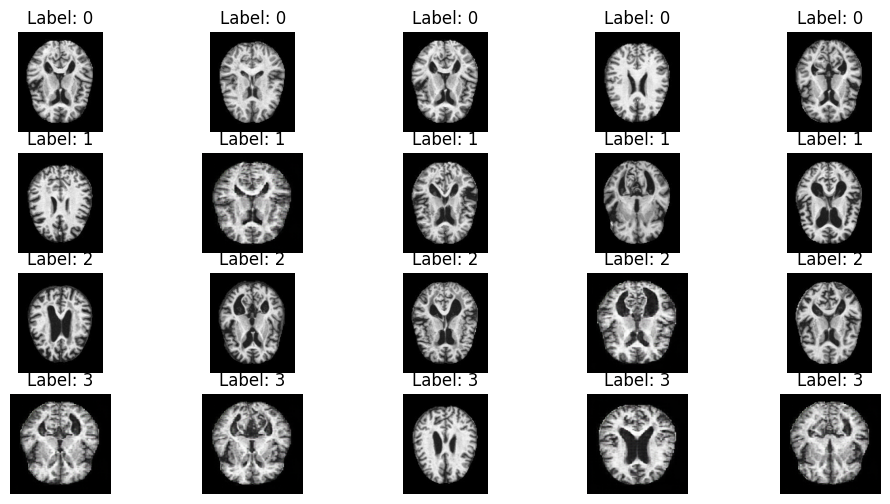

In [33]:
label_0_imgs = [data[i] for i in range(len(data)) if labels[i] == 0]
label_1_imgs = [data[i] for i in range(len(data)) if labels[i] == 1]
label_2_imgs = [data[i] for i in range(len(data)) if labels[i] == 2]
label_3_imgs = [data[i] for i in range(len(data)) if labels[i] == 3]

sample_0 = random.sample(label_0_imgs, min(5, len(label_0_imgs)))
sample_1 = random.sample(label_1_imgs, min(5, len(label_1_imgs)))
sample_2 = random.sample(label_2_imgs, min(5, len(label_2_imgs)))
sample_3 = random.sample(label_3_imgs, min(5, len(label_3_imgs)))

sample_images = sample_0 + sample_1 + sample_2 + sample_3
sample_labels = [0] * len(sample_0) + [1] * len(sample_1) + [2] * len(sample_2) + [3] * len(sample_3)

fig, axes = plt.subplots(4, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = Image.open(sample_images[i])
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {sample_labels[i]}")
    ax.axis("off")
plt.show()

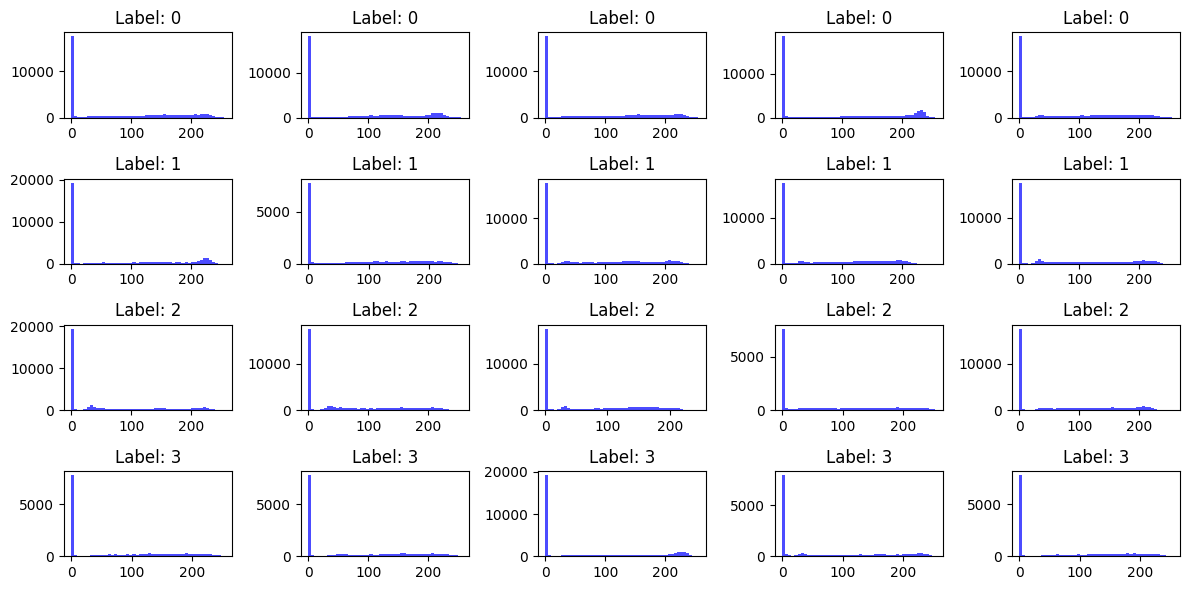

Görüntü 1 - Label 0: Ortalama = 0.298, Std Sapma = 0.335
Görüntü 2 - Label 0: Ortalama = 0.307, Std Sapma = 0.343
Görüntü 3 - Label 0: Ortalama = 0.301, Std Sapma = 0.338
Görüntü 4 - Label 0: Ortalama = 0.320, Std Sapma = 0.372
Görüntü 5 - Label 0: Ortalama = 0.278, Std Sapma = 0.317
Görüntü 6 - Label 1: Ortalama = 0.287, Std Sapma = 0.353
Görüntü 7 - Label 1: Ortalama = 0.292, Std Sapma = 0.327
Görüntü 8 - Label 1: Ortalama = 0.273, Std Sapma = 0.318
Görüntü 9 - Label 1: Ortalama = 0.262, Std Sapma = 0.298
Görüntü 10 - Label 1: Ortalama = 0.269, Std Sapma = 0.322
Görüntü 11 - Label 2: Ortalama = 0.234, Std Sapma = 0.312
Görüntü 12 - Label 2: Ortalama = 0.252, Std Sapma = 0.303
Görüntü 13 - Label 2: Ortalama = 0.253, Std Sapma = 0.296
Görüntü 14 - Label 2: Ortalama = 0.284, Std Sapma = 0.330
Görüntü 15 - Label 2: Ortalama = 0.276, Std Sapma = 0.317
Görüntü 16 - Label 3: Ortalama = 0.296, Std Sapma = 0.331
Görüntü 17 - Label 3: Ortalama = 0.293, Std Sapma = 0.330
Görüntü 18 - Label 3: O

In [34]:
fig, axes = plt.subplots(4, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = Image.open(sample_images[i]).convert("L")  
    img_np = np.array(img).flatten()
    ax.hist(img_np, bins=50, color='blue', alpha=0.7)
    ax.set_title(f"Label: {sample_labels[i]}")
plt.tight_layout()
plt.show()

for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("L")
    img_np = np.array(img) / 255.0 
    mean = np.mean(img_np)
    std = np.std(img_np)
    print(f"Görüntü {i+1} - Label {sample_labels[i]}: Ortalama = {mean:.3f}, Std Sapma = {std:.3f}")

In [35]:
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class BrainHemorrhageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        
        # Klasörleri (sınıfları) oku
        for label, class_name in enumerate(sorted(os.listdir(root_dir))):
            class_path = os.path.join(root_dir, class_name)
            if os.path.isdir(class_path):
                for img_name in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_name)
                    self.image_paths.append(img_path)
                    self.labels.append(label)


    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")  # Griye çevir
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Dönüşümleri tanımla
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resimleri 224x224 boyutuna getir
    transforms.ToTensor(),
])

# Datasetleri oluştur
train_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/train01", transform=transform)
val_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/valid01", transform=transform)
test_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/test", transform=transform)

# DataLoader'ları oluştur
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Veri seti büyüklüklerini yazdır
print(f"Eğitim Seti: {len(train_dataset)} görüntü")
print(f"Validasyon Seti: {len(val_dataset)} görüntü")
print(f"Test Seti: {len(test_dataset)} görüntü")


Eğitim Seti: 5194 görüntü
Validasyon Seti: 1298 görüntü
Test Seti: 1279 görüntü


In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

model = model.to(device)

class_counts = np.bincount(labels)
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.AdamW(model.parameters(), lr=0.0001)
num_epochs=25

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [37]:
print(class_weights)
print(class_counts)
print(criterion)

tensor([0.0003, 0.0004, 0.0008, 0.0048])
[3558 2752 1254  207]
CrossEntropyLoss()


In [38]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):
    
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1) 
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        
        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        
        # Validation
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        
        val_loss = val_loss / len(val_loader)
        val_acc = correct / total
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        
        # En iyi modeli kaydet
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_model_ad4cls_org_Res18.pth")
            print("Best model saved!")
    
    print("Training complete!")

In [39]:
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/25: Train Loss: 0.9559, Train Acc: 0.5693, Val Loss: 0.7716, Val Acc: 0.6364
Best model saved!
Epoch 2/25: Train Loss: 0.4703, Train Acc: 0.8111, Val Loss: 0.5619, Val Acc: 0.7589
Best model saved!
Epoch 3/25: Train Loss: 0.2021, Train Acc: 0.9330, Val Loss: 0.4021, Val Acc: 0.8398
Best model saved!
Epoch 4/25: Train Loss: 0.1434, Train Acc: 0.9549, Val Loss: 0.2262, Val Acc: 0.9083
Best model saved!
Epoch 5/25: Train Loss: 0.0521, Train Acc: 0.9856, Val Loss: 0.1858, Val Acc: 0.9337
Best model saved!
Epoch 6/25: Train Loss: 0.0444, Train Acc: 0.9856, Val Loss: 0.3597, Val Acc: 0.8698
Epoch 7/25: Train Loss: 0.0676, Train Acc: 0.9723, Val Loss: 0.2002, Val Acc: 0.9253
Epoch 8/25: Train Loss: 0.0247, Train Acc: 0.9921, Val Loss: 0.1568, Val Acc: 0.9399
Best model saved!
Epoch 9/25: Train Loss: 0.0343, Train Acc: 0.9871, Val Loss: 0.4356, Val Acc: 0.8760
Epoch 10/25: Train Loss: 0.1359, Train Acc: 0.9601, Val Loss: 0.3685, Val Acc: 0.8559
Epoch 11/25: Train Loss: 0.0528, Train Ac

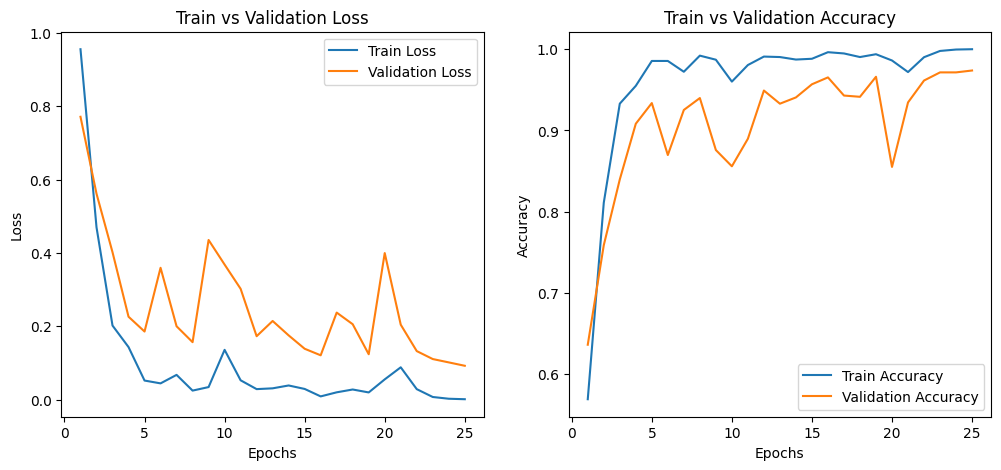

In [40]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
    
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
    
plt.show()

Test Accuracy: 0.7131
Test Precision: 0.7245
Test Recall: 0.7131
Test F1 Score: 0.6933

Classification Report:
               precision    recall  f1-score   support

         non       0.71      0.91      0.79       640
        very       0.71      0.61      0.65       448
        mild       0.83      0.30      0.44       179
        mode       0.86      0.50      0.63        12

    accuracy                           0.71      1279
   macro avg       0.77      0.58      0.63      1279
weighted avg       0.72      0.71      0.69      1279



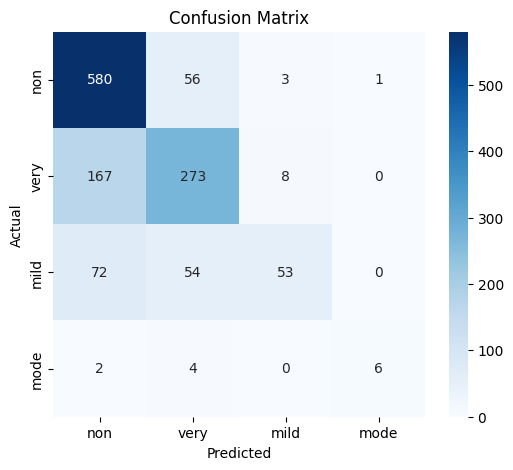

In [41]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(num_ftrs, 4)  
model.load_state_dict(torch.load("best_model_ad4cls_org_Res18.pth"))

model = model.to(device)
model.eval()

y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=['non', 'very','mild','mode'])

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['non', 'very','mild','mode'], yticklabels=['non', 'very','mild','mode'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
torch.cuda.empty_cache()

In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem40.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem48.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem22.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem1.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem45.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem31.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem0.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem16.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem44.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem15.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem12.jpg
/kaggle/input/ad4cls-or

In [44]:
import os
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# PyTorch ve Torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader

# Model kütüphaneleri
import timm

# Veri işleme ve makine öğrenmesi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_dir = "/kaggle/input/ad4cls-ext/AD4_class_ext_20may25"
non_dirs = ["/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/train01/01_non","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/valid01/01_non","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/test/01_non"]
very_dirs = ["/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/train01/02_very","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/valid01/02_very","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/test/02_very"]
mild_dirs = ["/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/train01/03_mild","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/valid01/03_mild","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/test/03_mild"]
mode_dirs = ["/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/train01/04_mode","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/valid01/04_mode","/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/test/04_mode"]

transform = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.0], std=[1.0]),
    transforms.Grayscale(num_output_channels=1)
])

data = []
labels = []

Using device: cuda


In [46]:
for subdir in non_dirs:
    non_path = os.path.join(data_dir, subdir)
    if os.path.exists(non_path):
        for img_name in os.listdir(non_path):
            img_path = os.path.join(non_path, img_name)
            data.append(img_path)
            labels.append(0)

for subdir in very_dirs:
    very_path = os.path.join(data_dir, subdir)
    if os.path.exists(very_path):
        for img_name in os.listdir(very_path):
            img_path = os.path.join(very_path, img_name)
            data.append(img_path)
            labels.append(1)

for subdir in mild_dirs:
    mild_path = os.path.join(data_dir, subdir)
    if os.path.exists(mild_path):
        for img_name in os.listdir(mild_path):
            img_path = os.path.join(mild_path, img_name)
            data.append(img_path)
            labels.append(2)

for subdir in mode_dirs:
    mode_path = os.path.join(data_dir, subdir)
    if os.path.exists(mode_path):
        for img_name in os.listdir(mode_path):
            img_path = os.path.join(mode_path, img_name)
            data.append(img_path)
            labels.append(3)

print(f"Toal number of non images: {labels.count(0)}")
print(f"Total number of very mild images: {labels.count(1)}")
print(f"Toal number of mild images: {labels.count(2)}")
print(f"Total number of mode images: {labels.count(3)}")

Toal number of non images: 3558
Total number of very mild images: 2752
Toal number of mild images: 1254
Total number of mode images: 207


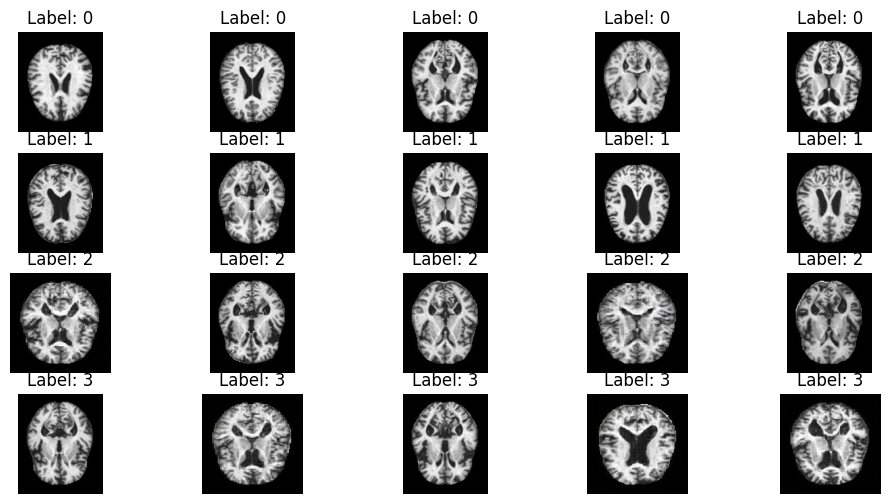

In [47]:
label_0_imgs = [data[i] for i in range(len(data)) if labels[i] == 0]
label_1_imgs = [data[i] for i in range(len(data)) if labels[i] == 1]
label_2_imgs = [data[i] for i in range(len(data)) if labels[i] == 2]
label_3_imgs = [data[i] for i in range(len(data)) if labels[i] == 3]

sample_0 = random.sample(label_0_imgs, min(5, len(label_0_imgs)))
sample_1 = random.sample(label_1_imgs, min(5, len(label_1_imgs)))
sample_2 = random.sample(label_2_imgs, min(5, len(label_2_imgs)))
sample_3 = random.sample(label_3_imgs, min(5, len(label_3_imgs)))

sample_images = sample_0 + sample_1 + sample_2 + sample_3
sample_labels = [0] * len(sample_0) + [1] * len(sample_1) + [2] * len(sample_2) + [3] * len(sample_3)

fig, axes = plt.subplots(4, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = Image.open(sample_images[i])
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {sample_labels[i]}")
    ax.axis("off")
plt.show()

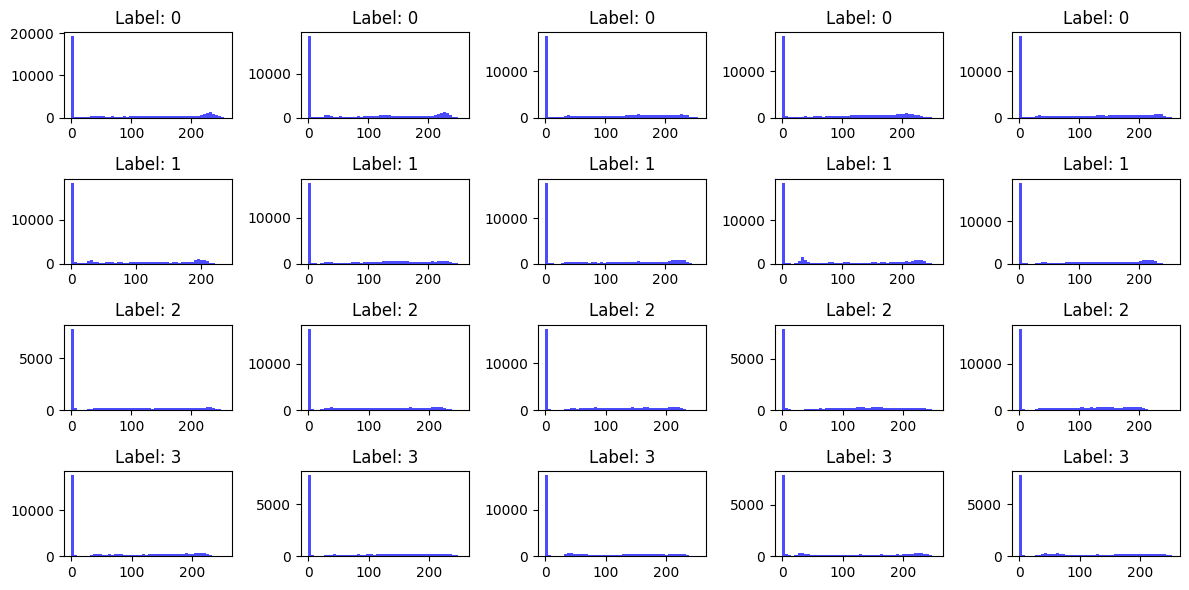

Görüntü 1 - Label 0: Ortalama = 0.292, Std Sapma = 0.359
Görüntü 2 - Label 0: Ortalama = 0.292, Std Sapma = 0.350
Görüntü 3 - Label 0: Ortalama = 0.301, Std Sapma = 0.338
Görüntü 4 - Label 0: Ortalama = 0.308, Std Sapma = 0.336
Görüntü 5 - Label 0: Ortalama = 0.293, Std Sapma = 0.339
Görüntü 6 - Label 1: Ortalama = 0.243, Std Sapma = 0.303
Görüntü 7 - Label 1: Ortalama = 0.293, Std Sapma = 0.331
Görüntü 8 - Label 1: Ortalama = 0.303, Std Sapma = 0.345
Görüntü 9 - Label 1: Ortalama = 0.261, Std Sapma = 0.337
Görüntü 10 - Label 1: Ortalama = 0.272, Std Sapma = 0.331
Görüntü 11 - Label 2: Ortalama = 0.286, Std Sapma = 0.329
Görüntü 12 - Label 2: Ortalama = 0.274, Std Sapma = 0.318
Görüntü 13 - Label 2: Ortalama = 0.282, Std Sapma = 0.316
Görüntü 14 - Label 2: Ortalama = 0.294, Std Sapma = 0.328
Görüntü 15 - Label 2: Ortalama = 0.252, Std Sapma = 0.286
Görüntü 16 - Label 3: Ortalama = 0.285, Std Sapma = 0.325
Görüntü 17 - Label 3: Ortalama = 0.290, Std Sapma = 0.328
Görüntü 18 - Label 3: O

In [48]:
fig, axes = plt.subplots(4, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = Image.open(sample_images[i]).convert("L")  
    img_np = np.array(img).flatten()
    ax.hist(img_np, bins=50, color='blue', alpha=0.7)
    ax.set_title(f"Label: {sample_labels[i]}")
plt.tight_layout()
plt.show()

for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("L")
    img_np = np.array(img) / 255.0 
    mean = np.mean(img_np)
    std = np.std(img_np)
    print(f"Görüntü {i+1} - Label {sample_labels[i]}: Ortalama = {mean:.3f}, Std Sapma = {std:.3f}")

In [49]:
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class BrainHemorrhageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        
        # Klasörleri (sınıfları) oku
        for label, class_name in enumerate(sorted(os.listdir(root_dir))):
            class_path = os.path.join(root_dir, class_name)
            if os.path.isdir(class_path):
                for img_name in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_name)
                    self.image_paths.append(img_path)
                    self.labels.append(label)


    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")  # Griye çevir
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Dönüşümleri tanımla
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resimleri 224x224 boyutuna getir
    transforms.ToTensor(),
])

# Datasetleri oluştur
train_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/train01", transform=transform)
val_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/valid01", transform=transform)
test_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-ext/AD4_class_ext_20may25/test", transform=transform)

# DataLoader'ları oluştur
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Veri seti büyüklüklerini yazdır
print(f"Eğitim Seti: {len(train_dataset)} görüntü")
print(f"Validasyon Seti: {len(val_dataset)} görüntü")
print(f"Test Seti: {len(test_dataset)} görüntü")


Eğitim Seti: 5194 görüntü
Validasyon Seti: 1298 görüntü
Test Seti: 1279 görüntü


In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

model = model.to(device)

class_counts = np.bincount(labels)
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.AdamW(model.parameters(), lr=0.0001)
num_epochs=25

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [51]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):
    
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)   
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        
        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        
        # Validation
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        
        val_loss = val_loss / len(val_loader)
        val_acc = correct / total
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        
        # En iyi modeli kaydet
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_model_ad4cls_org_Res50.pth")
            print("Best model saved!")
    
    print("Training complete!")

In [52]:
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/25: Train Loss: 0.9372, Train Acc: 0.5697, Val Loss: 0.7024, Val Acc: 0.6764
Best model saved!
Epoch 2/25: Train Loss: 0.4697, Train Acc: 0.8065, Val Loss: 0.5763, Val Acc: 0.7604
Best model saved!
Epoch 3/25: Train Loss: 0.2226, Train Acc: 0.9191, Val Loss: 0.5013, Val Acc: 0.8228
Best model saved!
Epoch 4/25: Train Loss: 0.2434, Train Acc: 0.9164, Val Loss: 0.2755, Val Acc: 0.8945
Best model saved!
Epoch 5/25: Train Loss: 0.1176, Train Acc: 0.9663, Val Loss: 0.2571, Val Acc: 0.9091
Best model saved!
Epoch 6/25: Train Loss: 0.0898, Train Acc: 0.9688, Val Loss: 0.2349, Val Acc: 0.9137
Best model saved!
Epoch 7/25: Train Loss: 0.0444, Train Acc: 0.9854, Val Loss: 0.1887, Val Acc: 0.9384
Best model saved!
Epoch 8/25: Train Loss: 0.0908, Train Acc: 0.9705, Val Loss: 0.2752, Val Acc: 0.9106
Epoch 9/25: Train Loss: 0.0562, Train Acc: 0.9807, Val Loss: 0.2532, Val Acc: 0.9168
Epoch 10/25: Train Loss: 0.0145, Train Acc: 0.9958, Val Loss: 0.1551, Val Acc: 0.9569
Best model saved!
Epoch

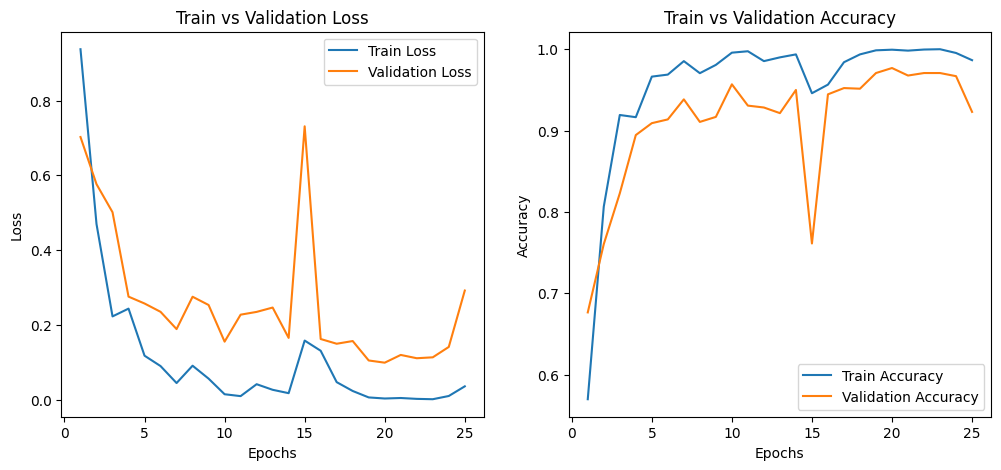

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
    
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
    
plt.show()

Test Accuracy: 0.6880
Test Precision: 0.7049
Test Recall: 0.6880
Test F1 Score: 0.6833

Classification Report:
               precision    recall  f1-score   support

         non       0.78      0.72      0.75       640
        very       0.59      0.77      0.67       448
        mild       0.69      0.40      0.50       179
        mode       1.00      0.17      0.29        12

    accuracy                           0.69      1279
   macro avg       0.77      0.51      0.55      1279
weighted avg       0.70      0.69      0.68      1279



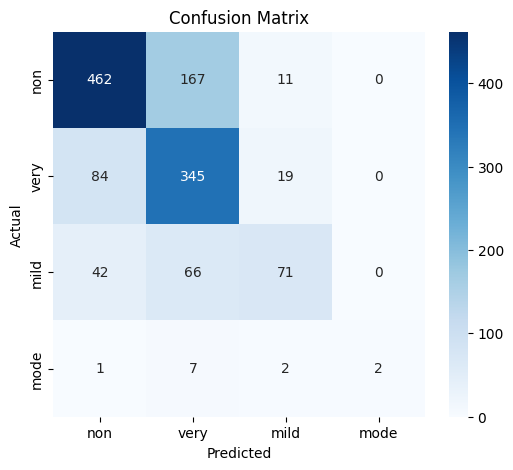

In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(num_ftrs, 4)  
model.load_state_dict(torch.load("best_model_ad4cls_org_Res50.pth"))

model = model.to(device)
model.eval()

y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=['non', 'very','mild','mode'])

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['non', 'very','mild','mode'], yticklabels=['non', 'very','mild','mode'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()